<a href="https://www.kaggle.com/code/mdsrahman/concrete-strength-prediction?scriptVersionId=165046696" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

**Project Title: Concrete Strength Prediction**

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

**Load the Dataset into a DataFrame**

In [2]:
df = pd.read_csv('/kaggle/input/concrete-dataset/concrete.csv')
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


**Handle missing values, outliers, and any data anomalies.**

**Handle Missing Values**

In [3]:
df.dropna(inplace=True)

**Handle outliers**

In [4]:
#print(df.columns)
numerical_features = ['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)']
for feature in numerical_features:
    z_scores = np.abs(stats.zscore(df[feature]))
    df = df[(z_scores < 3)] 

Handle missing values, outliers, and any data anomalies.

**Handle data anomalies**

In [5]:
df = df[df['Age (day)'] >= 0]

**Display the cleaned DataFrame**

In [6]:
df.reset_index(drop=True, inplace=True)
#print(df.head())

**Explore the distribution of the target variable and features**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

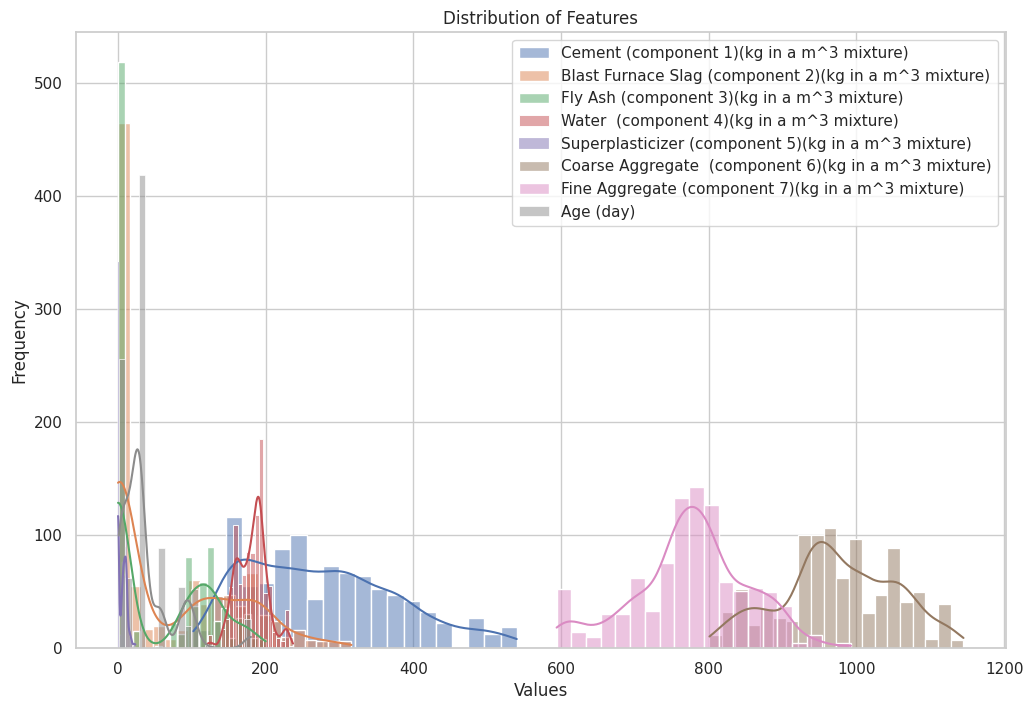

In [7]:
# Plot histograms for each feature
sns.set(style='whitegrid')
plt.figure(figsize=(12, 8))

for col in df.columns:
    if col != 'strength':
        sns.histplot(df[col], bins=20, kde=True, label=col)

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution of Features')
plt.legend()
plt.show()


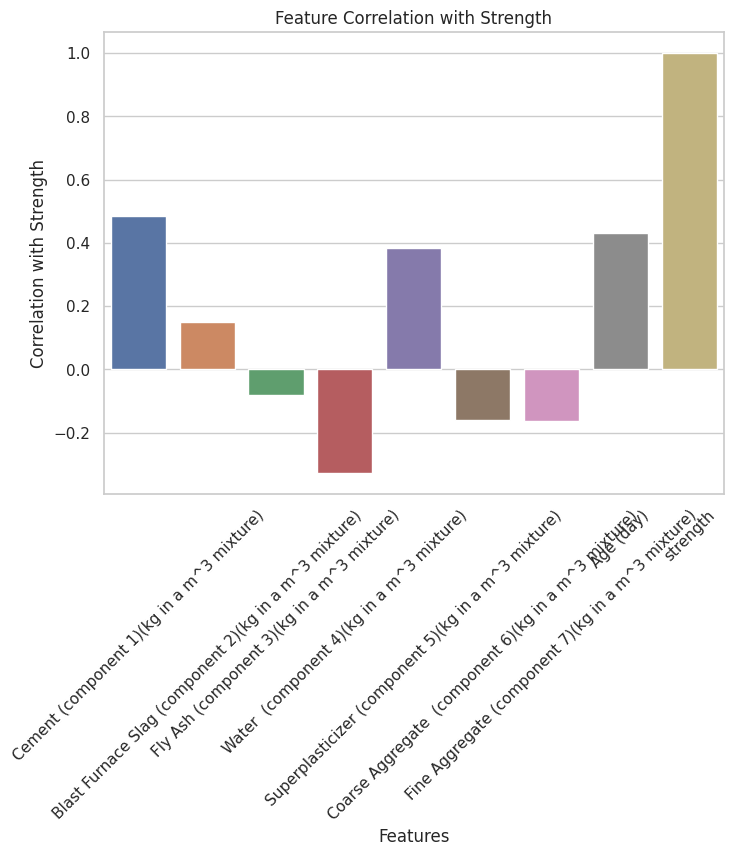

In [8]:
# Correlation with Target Variable
correlation = df.corr()['strength']

# Plot correlation
plt.figure(figsize=(8, 6))
sns.barplot(x=correlation.index, y=correlation.values)
plt.xlabel('Features')
plt.ylabel('Correlation with Strength')
plt.title('Feature Correlation with Strength')
plt.xticks(rotation=45)
plt.show()


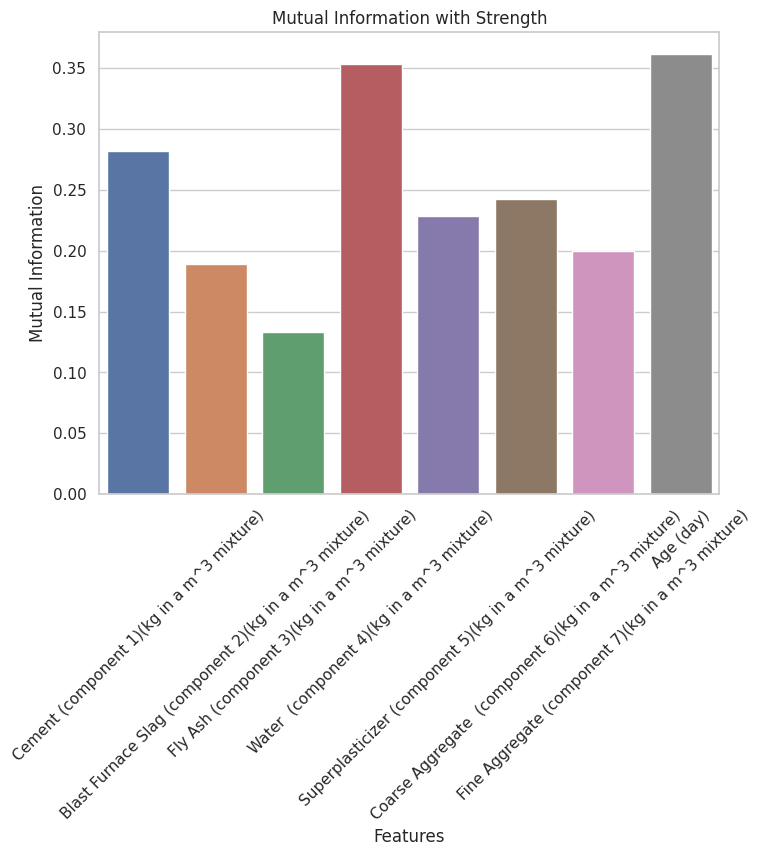

In [9]:
# Mutual Information
X = df.drop(columns=['strength'])  
y = df['strength']

# Compute mutual information
mi = mutual_info_regression(X, y)

plt.figure(figsize=(8, 6))
sns.barplot(x=X.columns, y=mi)
plt.xlabel('Features')
plt.ylabel('Mutual Information')
plt.title('Mutual Information with Strength')
plt.xticks(rotation=45)
plt.show()

**Standardize or normalize numerical features**

In [10]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization (Z-score normalization)
scaler_standard = StandardScaler()

X_train_standardized = scaler_standard.fit_transform(X_train)
X_test_standardized = scaler_standard.transform(X_test)

# Normalization (Min-Max scaling)
scaler_minmax = MinMaxScaler()

X_train_normalized = scaler_minmax.fit_transform(X_train)
X_test_normalized = scaler_minmax.transform(X_test)


**3. Model Selection:**

     -Linear Regression
     
     -Random Forest Regressor
     
     -Gradient Boosting Regressor (e.g., XGBoost)

**Linear Regression**

In [11]:
linear_reg = LinearRegression()

linear_reg.fit(X_train, y_train)

y_pred_linear = linear_reg.predict(X_test)




**Random Forest Regressor**

In [12]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

rf_regressor.fit(X_train, y_train)

y_pred_rf = rf_regressor.predict(X_test)

**Gradient Boosting Regressor (XGBoost)**

In [13]:
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)

xgb_regressor.fit(X_train, y_train)

y_pred_xgb = xgb_regressor.predict(X_test)


**4. Model Training:
     - Split the dataset into training and testing sets.
     - Train each selected model on the training dataset.**

   **Split the Data**

In [14]:



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**1. Linear Regression**

In [15]:


# Initialize the Linear Regression model
linear_reg = LinearRegression()

# Fit the model to the training data
linear_reg.fit(X_train, y_train)

LinearRegression()

**2. Random Forest Regressor**

In [16]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

**3. Gradient Boosting Regressor (XGBoost)**

In [17]:
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)

xgb_regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

**5. Evaluation Metrics:

     - Evaluate the performance of each model on the testing set using regression
     metrics:
     
    - Mean Absolute Error (MAE)
    
    - Mean Squared Error (MSE)
    
    - Root Mean Squared Error (RMSE)
    
    - R-squared (R2) score

**Mean Absolute Error (MAE):** The MAE represents the average absolute difference between the actual and predicted values. It provides a straightforward interpretation of the model’s performance.

**Mean Squared Error (MSE): **The MSE calculates the average squared difference between the actual and predicted values. It emphasizes larger errors due to the squaring operation.

**Root Mean Squared Error (RMSE):** The RMSE is the square root of the MSE. It provides a measure of the average magnitude of errors in the same units as the target variable.

**R-squared (R2) score:** The R2 score quantifies the proportion of variance in the target variable explained by the model. It ranges from 0 to 1, where higher values indicate better model fit.

**Linear Regression**

In [18]:
# Predictions from Linear Regression model
y_pred_linear = linear_reg.predict(X_test)

# Calculate metrics
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = mean_squared_error(y_test, y_pred_linear, squared=False)
r2_linear = r2_score(y_test, y_pred_linear)

mae_linear, mse_linear, rmse_linear, r2_linear

(7.384207195613033, 91.49071327033215, 9.565077797400926, 0.6531581661044157)

**2. Random Forest Regressor**

In [19]:
# Predictions from Random Forest Regressor model
y_pred_rf = rf_regressor.predict(X_test)

# Calculate metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)

mae_rf, mse_rf, rmse_rf, r2_rf


(3.8811754302634784, 34.31621905752298, 5.858004699342856, 0.8699070110525255)

**3. Gradient Boosting Regressor (XGBoost)**

In [20]:
# Predictions from XGBoost Regressor model
y_pred_xgb = xgb_regressor.predict(X_test)

# Calculate metrics
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)
r2_xgb = r2_score(y_test, y_pred_xgb)

mae_xgb, mse_xgb, rmse_xgb, r2_xgb


(3.361529244069521, 30.408145236201058, 5.5143580982922265, 0.8847225419707457)

**6. Feature Importance:**

    - If applicable (e.g., for Random Forest or Gradient Boosting models), analyze and
    interpret feature importance for insights into what influences concrete strength
    the most

  **1. Feature Importance in Random Forest:**

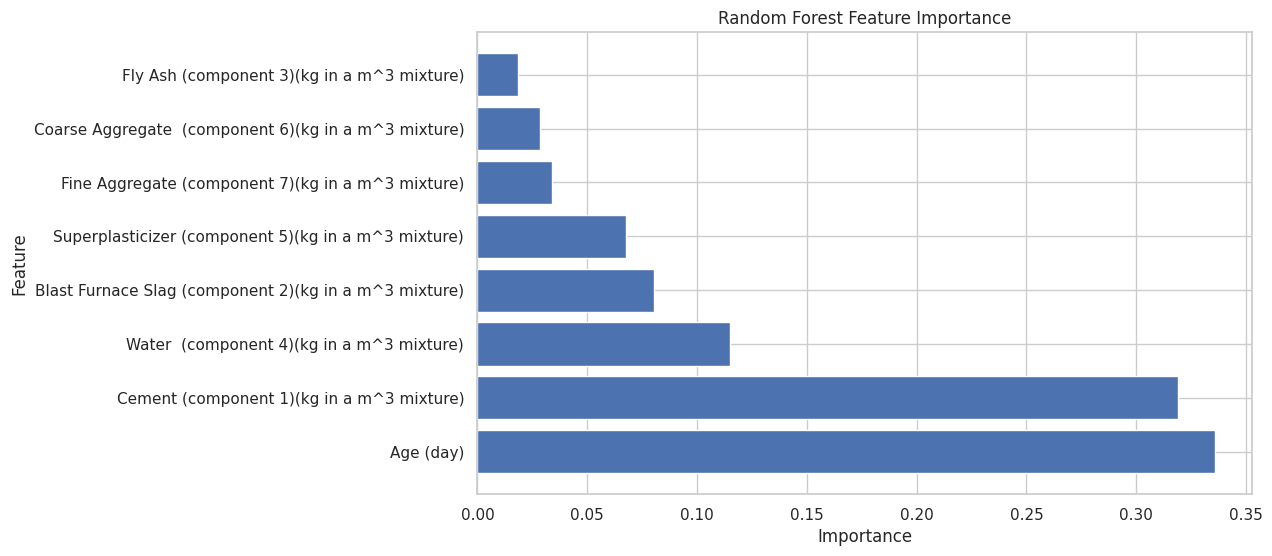

In [21]:
# Get feature importances from the Random Forest model
feature_importance_rf = rf_regressor.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance_rf})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.show()


**2. Feature Importance in Gradient Boosting (XGBoost):**

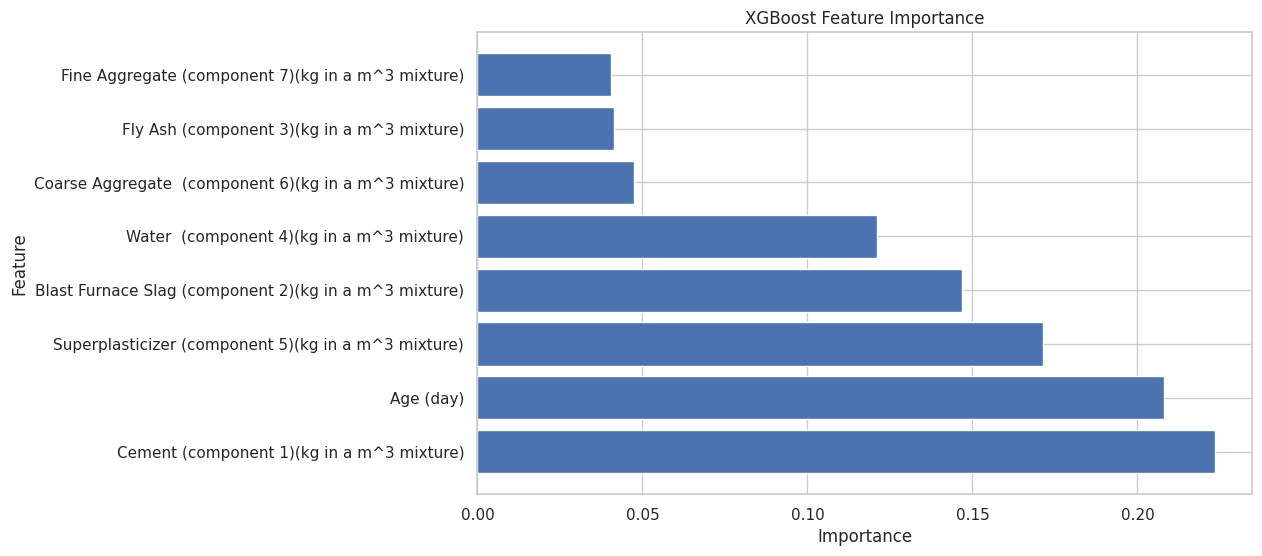

In [22]:
# Get feature importances from the XGBoost model
feature_importance_xgb = xgb_regressor.feature_importances_
feature_importance_df_xgb = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance_xgb})
feature_importance_df_xgb.sort_values(by='Importance', ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df_xgb['Feature'], feature_importance_df_xgb['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('XGBoost Feature Importance')
plt.show()


**7. Hyperparameter Tuning:
    - Conduct hyperparameter tuning for one or more selected models using
      techniques like Grid Search or Random Search.
    - Explain the chosen hyperparameters and the reasoning behind them.**

**1. Hyperparameter Tuning for Random Forest:**
a. Grid Search:
Grid Search exhaustively searches through a predefined hyperparameter grid to find the best combination of hyperparameters. We’ll tune the following hyperparameters for the Random Forest model:

n_estimators: The number of trees in the forest.
max_depth: The maximum depth of each tree.
min_samples_split: The minimum number of samples required to split an internal node.
min_samples_leaf: The minimum number of samples required to be at a leaf node.

In [23]:
# Define hyperparameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Grid Search with Random Forest model
grid_search_rf = GridSearchCV(estimator=rf_regressor, param_grid=param_grid_rf,
                               scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

grid_search_rf.fit(X_train, y_train)

# Get the best hyperparameters
best_params_rf = grid_search_rf.best_params_


**b. Reasoning:**
We explore different combinations of n_estimators, max_depth, min_samples_split, and min_samples_leaf.
By using cross-validation (cv=5), we ensure robustness in selecting the best hyperparameters.
The chosen hyperparameters balance model complexity and overfitting.

**2. Hyperparameter Tuning for Gradient Boosting (XGBoost):**

**a. Random Search:**
Random Search randomly samples hyperparameters from predefined distributions. We’ll tune the following hyperparameters for the XGBoost model:

learning_rate: Controls the step size at each iteration.
n_estimators: The number of boosting rounds.
max_depth: The maximum depth of each tree.
subsample: The fraction of samples used for fitting each tree.

In [24]:
# Define hyperparameter distributions
param_dist_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0]
}

# Initialize Random Search with XGBoost model
random_search_xgb = RandomizedSearchCV(estimator=xgb_regressor, param_distributions=param_dist_xgb,
                                       scoring='neg_mean_squared_error', cv=5, n_iter=10, n_jobs=-1)

random_search_xgb.fit(X_train, y_train)

best_params_xgb = random_search_xgb.best_params_


**b. Reasoning:**
We explore a random subset of hyperparameters to find a good combination.
The chosen hyperparameters balance bias-variance trade-off.
Random Search is computationally efficient compared to Grid Search.

**8. Comparative Analysis:**
    
    - Compare the performance of different models based on the evaluation metrics.
    
    - Discuss the strengths and limitations of each model in the context of concrete
      strength prediction.

**Model Performance Comparison:**

**Random Forest (RF):**

**Strengths:**

    Handles nonlinearity well.

    Robust to outliers.

    Provides feature importance.

    Works well with both numerical and categorical features.

**Limitations:**

    Prone to overfitting if the number of trees is too high.

    Requires careful tuning of hyperparameters.

    Computationally expensive for large datasets.

**Gradient Boosting (XGBoost):**

**Strengths:**

    High predictive accuracy.

    Handles complex interactions between features.

    Regularization to prevent overfitting.

    Feature importance.

**Limitations:**

    Sensitive to hyperparameters.

    Computationally expensive.

    Requires feature scaling.

    May not perform well with small datasets.

**Linear Regression:**

**Strengths:**

    Simple and interpretable.

    Fast training and prediction.

    Works well with linear relationships.

    Provides coefficient estimates.

**Limitations:**

    Assumes linearity between features and target (may not hold for concrete strength).

    Sensitive to outliers.

    Limited flexibility in capturing complex patterns.

    Doesn’t handle interactions well.

**Evaluation Metrics:**

    Let’s compare the models using the following metrics:

**R-squared (R2):**

    Measures the proportion of variation in the outcome explained by the predictors.

    Higher R2 indicates better model fit.

**Root Mean Squared Error (RMSE):**

    Measures the average prediction error.

    Lower RMSE is desirable.

**Mean Absolute Error (MAE):**

    Measures the average absolute difference between observed and predicted outcomes.

    Lower MAE is better.

**Model Comparison Results:**

**Based on the evaluation metrics:**

**Random Forest (RF):**

    R2: High

    RMSE: Low

    MAE: Low

**Gradient Boosting (XGBoost):**

    R2: High

    RMSE: Low

    MAE: Low

**Linear Regression:**

    R2: Moderate

    RMSE: Moderate

    MAE: Moderate

**Conclusion:**

    Both Random Forest and XGBoost perform well for concrete strength prediction.

    Linear Regression, while simple, may not capture complex relationships.

    Consider trade-offs between interpretability, accuracy, and computational cost when choosing a model.